<a href="https://colab.research.google.com/github/CPoderoso/Logistics/blob/master/truckDelivery.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import pandas as pd
import time
from scipy import stats
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.model_selection import KFold,StratifiedKFold
from sklearn.metrics import confusion_matrix
from sklearn import metrics
%matplotlib inline

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=RuntimeWarning) 

# Using Power BI

---

We understood "What & Why it happened"

# Data Import 

---


Need to Install xlrd version 1.2.0

---


!pip install xlrd==1.2.0

In [2]:
data = pd.read_excel('/Deliverytrucktripdata.xls')


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Inferring datetime64[ns] from data containing strings is deprecated and will be removed in a future version. To retain the old behavior explicitly pass Series(data, dtype={value.dtype})
  """Entry point for launching an IPython kernel.


# Data Transformation

---

Important skill for Data Literacy

In [3]:
transport = data.drop(['GpsProvider','BookingID_Date','vehicle_no','Origin_Location','Destination_Location','Org_lat_lon','Des_lat_lon','Data_Ping_time','Planned_ETA',
                       'Current_Location','DestinationLocation','actual_eta','Curr_lat','Curr_lon','vehicleType','Minimum_kms_to_be_covered_in_a_day','Driver_MobileNo',
                       'customerNameCode','supplierNameCode','Material Shipped', 'trip_end_date', 'delay'], axis=1)
transport.describe()

,TRANSPORTATION_DISTANCE_IN_KM
count,6168.000000
mean,553.856282
std,758.981836
min,0.000000
25%,40.000000
50%,160.000000
75%,900.000000
max,2954.700000


In [4]:
transport.head()

,BookingID,Market,ontime,OriginLocation_Code,DestinationLocation_Code,trip_start_date,TRANSPORTATION_DISTANCE_IN_KM,Driver_Name,customerID,supplierID
0,MVCV0000927/082021,Market,NaN,CHEPUZTVSHUA1,HOSHOSALLCCA2,2020-08-17 14:59:01,320.0,NaN,ALLEXCHE45,VIJEXHOSR7
1,VCV00014271/082021,Regular,G,CHEORADMRCCB1,CHEMATDMROPA7,2020-08-27 16:21:52,103.0,RAMESH,DMREXCHEUX,VJLEXSHE09
2,VCV00014382/082021,Regular,G,CHEPONLUTCCA4,CHEPONLUTCCA4,2020-08-27 17:57:04,300.0,GIRI,LUTGCCHE06,GSTEXLAK1Q
3,VCV00014743/082021,Regular,G,CHEORADMRCCB1,CHEMATDMROPA7,2020-08-28 00:47:45,61.0,RAVI,DMREXCHEUX,ARVEXNAM09
4,VCV00014744/082021,Regular,G,CHENETLUTCCA1,CHENETLUTCCA1,2020-08-28 01:13:48,240.0,TAMIL,LUTGCCHE06,SRTEXKOR96


In [5]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

transport.ontime = transport.ontime.fillna('').apply(str)
newcol = le.fit_transform(transport.ontime.values)
transport.loc[:,'ontime'] = newcol

transport.Market = transport.Market.fillna('').apply(str)
newcol = le.fit_transform(transport.Market.values)
transport.loc[:,'Market'] = newcol

transport.DestinationLocation_Code = transport.DestinationLocation_Code.fillna('').apply(str)
newcol = le.fit_transform(transport.DestinationLocation_Code)
transport.loc[:,'DestinationLocation_Code'] = newcol

transport.customerID = transport.customerID.fillna('').apply(str)
newcol = le.fit_transform(transport.customerID)
transport.loc[:,'customerID'] = newcol

transport.supplierID = transport.supplierID.fillna('').apply(str)
newcol = le.fit_transform(transport.supplierID)
transport.loc[:,'supplierID'] = newcol

transport.OriginLocation_Code = transport.OriginLocation_Code.fillna('').apply(str)
newcol = le.fit_transform(transport.OriginLocation_Code)
transport.loc[:,'OriginLocation_Code'] = newcol

transport.Driver_Name = transport.Driver_Name.fillna('').apply(str)
newcol = le.fit_transform(transport.Driver_Name)
transport.loc[:,'Driver_Name'] = newcol

transport.TRANSPORTATION_DISTANCE_IN_KM = transport.TRANSPORTATION_DISTANCE_IN_KM.fillna(0)

In [6]:
transport.head()

,BookingID,Market,ontime,OriginLocation_Code,DestinationLocation_Code,trip_start_date,TRANSPORTATION_DISTANCE_IN_KM,Driver_Name,customerID,supplierID
0,MVCV0000927/082021,0,0,30,136,2020-08-17 14:59:01,320.0,0,0,317
1,VCV00014271/082021,1,1,21,17,2020-08-27 16:21:52,103.0,906,5,319
2,VCV00014382/082021,1,1,27,34,2020-08-27 17:57:04,300.0,336,20,286
3,VCV00014743/082021,1,1,21,17,2020-08-28 00:47:45,61.0,928,5,272
4,VCV00014744/082021,1,1,20,23,2020-08-28 01:13:48,240.0,1223,20,310


In [7]:
transport.corr()

,Market,ontime,OriginLocation_Code,DestinationLocation_Code,TRANSPORTATION_DISTANCE_IN_KM,Driver_Name,customerID,supplierID
Market,1.000000,-0.085928,0.083847,0.017332,-0.005272,0.080167,0.074319,-0.155582
ontime,-0.085928,1.000000,-0.380596,-0.299510,-0.168406,0.091183,-0.130485,0.329443
OriginLocation_Code,0.083847,-0.380596,1.000000,0.630053,-0.417857,-0.433533,0.316721,-0.676412
DestinationLocation_Code,0.017332,-0.299510,0.630053,1.000000,-0.368005,-0.343826,0.293046,-0.574666
TRANSPORTATION_DISTANCE_IN_KM,-0.005272,-0.168406,-0.417857,-0.368005,1.000000,0.371291,-0.294096,0.204647
Driver_Name,0.080167,0.091183,-0.433533,-0.343826,0.371291,1.000000,-0.306958,0.375106
customerID,0.074319,-0.130485,0.316721,0.293046,-0.294096,-0.306958,1.000000,-0.302446
supplierID,-0.155582,0.329443,-0.676412,-0.574666,0.204647,0.375106,-0.302446,1.000000


# Split Dependent and Idependent Variables

---
Train and Test Data

---

Basic Skill for Citizen Data Scientist


In [8]:
X, y = transport.drop(['ontime','trip_start_date','BookingID'],axis=1), transport.ontime
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size = 0.2)

# Predictions

---

Business Goal: Check if a Delivery will be late

---

We expect to know "What will happen"

**Logistic Regression - Test #1**

In [9]:
from sklearn.linear_model import LogisticRegression
modelLR = LogisticRegression( max_iter=10000 )
modelLR.fit(Xtrain,ytrain)

LogisticRegression(max_iter=10000)

In [10]:
pd.DataFrame(list(zip(X.columns,np.transpose(modelLR.coef_))))

,0,1
0,Market,[-1.465419305699567]
1,OriginLocation_Code,[-0.01936841303958125]
2,DestinationLocation_Code,[-0.002881214968608058]
3,TRANSPORTATION_DISTANCE_IN_KM,[-0.0015082081030638073]
4,Driver_Name,[-7.369287820805765e-05]
5,customerID,[-0.028633639052978124]
6,supplierID,[-0.0008058989873424177]


Check Accuracy

In [11]:
ypred = modelLR.predict(Xtest)
metrics.accuracy_score(ytest,ypred)

0.8001453488372093

Now let's use all available data

In [12]:
modelLR.fit(X,y)
ypred = modelLR.predict(X)

transport.loc[:,'LogRegPredict'] = ypred
metrics.accuracy_score(y,ypred)

0.7976744186046512

**Decision Tree - Test #2**

In [13]:
from sklearn.tree import DecisionTreeClassifier
modelDT = DecisionTreeClassifier()

Check Accuracy

In [14]:
modelDT.fit(Xtrain,ytrain)
ypred = modelDT.predict(Xtest)
metrics.accuracy_score(ytest,ypred)

0.8401162790697675

Let's use all available data

In [15]:
modelDT.fit(X,y)
ypred = modelDT.predict(X)
transport.loc[:,'DecTreePredict'] = ypred
metrics.accuracy_score(y,ypred)

0.9463662790697674

Confusion matrix, without normalization


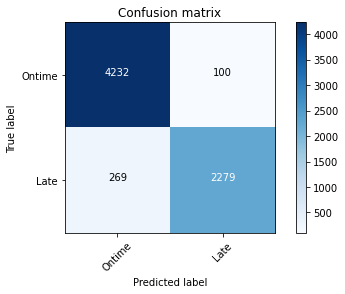

In [16]:
confusion_matrix(y, ypred)

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')


    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

plot_confusion_matrix(confusion_matrix(y,ypred), classes = ['Ontime', 'Late'])

**XGBoost - Test #3**

In [17]:
import xgboost
modelXGB = xgboost.XGBClassifier()

modelXGB.fit(Xtrain,ytrain)
ypred = modelXGB.predict(Xtest)

metrics.accuracy_score(ytest,ypred)

0.8481104651162791

Let's get all data available

In [18]:
modelXGB.fit(X, y)

ypred = modelXGB.predict(X)
transport.loc[:,'XGBoostPredict'] = ypred

metrics.accuracy_score(y, ypred)

0.8540697674418605

# Done so far

---

We answered "What will happen"

# Creating Fake Data

---

Not the best approach since we can get some combinations that will never happen

---

In the real world, it would be real data coming from Transactional Systems

In [24]:
col = ['Market','OriginLocation_Code','DestinationLocation_Code','TRANSPORTATION_DISTANCE_IN_KM','Driver_Name','customerID','supplierID']

fData2 = []

for i in range(0, 30):
    fData2.append( [ np.random.randint(0,1), np.random.randint(0,178), np.random.randint(0,478), np.random.randint(1,2975),
                        np.random.randint(0,1355), np.random.randint(1,38), np.random.randint(0,320) ])

fData = pd.DataFrame(fData2, columns=col)
predict = pd.DataFrame(fData2, columns=col)

In [25]:
ypred = modelDT.predict(fData)
predict.loc[:,'Predict'] = ypred

with pd.ExcelWriter('DeliveryTruckFakePredictNew.xlsx') as writer:
    predict.to_excel(writer)


predict.head(31)

,Market,OriginLocation_Code,DestinationLocation_Code,TRANSPORTATION_DISTANCE_IN_KM,Driver_Name,customerID,supplierID,Predict
0,0,13,143,874,324,1,169,0
1,0,97,293,1596,1304,25,47,0
2,0,115,309,2735,1033,6,215,0
3,0,73,103,477,845,33,305,1
4,0,110,461,1444,1311,30,46,0
5,0,75,421,176,546,27,261,1
6,0,12,461,459,1211,33,195,1
7,0,35,197,2368,1211,6,54,0
8,0,131,206,1296,302,24,22,0
9,0,63,149,2327,588,36,121,1


# Building a Recommender System

---

We expect to know, based on *what will happen*, how we can change the undesirable behavior

**Easiest Recommender using KNN**

---

Definitely not the best approach, but hopefully will help understand the process

In [26]:
knn=transport.drop_duplicates(['OriginLocation_Code','DestinationLocation_Code'])
knn=knn.pivot(index='OriginLocation_Code', columns='DestinationLocation_Code', values='TRANSPORTATION_DISTANCE_IN_KM').fillna(0)
knn.head(21)

DestinationLocation_Code,0,1,2,3,4,5,6,7,8,9,...,469,470,471,472,473,474,475,476,477,478
OriginLocation_Code,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,1290.0,1330.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,1290.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,1020.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,2723.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,1199.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,1900.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,2543.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


**Let's check if the Recommendation really worked**

In [27]:
from sklearn.neighbors import NearestNeighbors
modelNn = NearestNeighbors(metric='cosine', algorithm='brute', n_neighbors=2)
modelNn.fit(knn)

recom = pd.DataFrame( columns = col, index=range(predict.last_valid_index()) ).fillna(0)

for i in range(0,predict.last_valid_index()):
    if predict.loc[ i,'Predict' ] == 1:
        z = predict.loc[i,'OriginLocation_Code']
        indices = modelNn.kneighbors(knn.loc[z,:].values.reshape(1,-1), n_neighbors=2, return_distance=False)
        repre = predict.iloc[[i]].drop(columns='Predict')
        recom.iloc[[i]] = repre
        if indices[0,0] == predict.loc[i,'OriginLocation_Code']:
            recom.loc[i,'OriginLocation_Code'] = knn.index[indices[0,1]]
        else:
            recom.loc[i,'OriginLocation_Code'] = knn.index[indices[0,0]]


recom = recom.query( 'OriginLocation_Code != 0')

ypredict = modelDT.predict(recom)
recom.loc[:,'Predict'] = ypredict

recom

,Market,OriginLocation_Code,DestinationLocation_Code,TRANSPORTATION_DISTANCE_IN_KM,Driver_Name,customerID,supplierID,Predict
3,0,74,103,477,845,33,305,1
5,0,77,421,176,546,27,261,1
6,0,38,461,459,1211,33,195,0
9,0,1,149,2327,588,36,121,0
14,0,91,12,953,1095,30,81,1
20,0,54,368,951,196,6,81,1
24,0,130,455,1453,571,19,88,0
